In [2]:
import pandas as pd

df = pd.read_csv('../train/mobile_price_train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
x=df.iloc[:, :-1]
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [9]:
y = df.iloc[:,-1]
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [11]:
import pickle

x.to_pickle('xTrain.pkl')
y.to_pickle('yTrain.pkl')

In [14]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler를 사용하여 데이터프레임의 값을 -1에서 1 사이의 값으로 변환
scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [15]:
normalized_x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.544422,-1.0,0.36,-1.0,-0.894737,-1.0,-0.838710,0.111111,0.800000,-0.714286,-0.8,-0.979592,-0.658211,0.225548,-0.428571,-0.222222,8.888889e-01,-1.0,-1.0,1.0
1,-0.305277,1.0,-1.00,1.0,-1.000000,1.0,0.645161,0.333333,-0.066667,-0.428571,-0.4,-0.076531,0.986649,0.269375,0.714286,-0.666667,-4.444444e-01,1.0,1.0,-1.0
2,-0.917168,1.0,-1.00,1.0,-0.789474,1.0,0.258065,0.777778,0.083333,0.142857,-0.4,0.288776,0.623498,0.254409,-0.142857,-0.777778,-2.222222e-01,1.0,1.0,-1.0
3,-0.847695,1.0,0.60,-1.0,-1.000000,-1.0,-0.741935,0.555556,-0.150000,0.428571,-0.1,0.240816,0.716956,0.343132,0.571429,-0.111111,-2.220446e-16,1.0,-1.0,-1.0
4,0.763527,1.0,-0.44,-1.0,0.368421,1.0,0.354839,0.111111,0.016667,-0.714286,0.4,0.232653,-0.049399,-0.382683,-0.571429,-0.777778,4.444444e-01,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.608550,1.0,-1.00,1.0,-1.000000,1.0,-1.000000,0.555556,-0.566667,0.428571,0.4,0.246939,0.855808,-0.779797,0.142857,-0.555556,8.888889e-01,1.0,1.0,-1.0
1996,0.955912,1.0,0.68,1.0,-1.000000,-1.0,0.193548,-0.777778,0.783333,-0.142857,-0.7,-0.066327,0.955941,-0.050775,-0.142857,0.111111,5.555556e-01,1.0,1.0,1.0
1997,0.883768,-1.0,-0.68,1.0,-0.894737,1.0,0.096774,0.333333,-0.533333,1.000000,-0.7,-0.114286,0.511348,0.497060,-0.428571,-0.888889,-6.666667e-01,1.0,1.0,-1.0
1998,0.350701,-1.0,-0.68,-1.0,-0.578947,1.0,0.419355,-1.000000,0.083333,0.142857,-0.5,-0.657143,-0.773031,-0.672368,0.857143,0.111111,8.888889e-01,1.0,1.0,1.0


In [16]:
normalized_x.to_pickle('xTrain_normalized.pkl')

In [17]:
with open('xTrain_normalized.pkl','rb') as f1:
    X = pickle.load(f1)

In [22]:
normalized_x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.544422,-1.0,0.36,-1.0,-0.894737,-1.0,-0.838710,0.111111,0.800000,-0.714286,-0.8,-0.979592,-0.658211,0.225548,-0.428571,-0.222222,8.888889e-01,-1.0,-1.0,1.0
1,-0.305277,1.0,-1.00,1.0,-1.000000,1.0,0.645161,0.333333,-0.066667,-0.428571,-0.4,-0.076531,0.986649,0.269375,0.714286,-0.666667,-4.444444e-01,1.0,1.0,-1.0
2,-0.917168,1.0,-1.00,1.0,-0.789474,1.0,0.258065,0.777778,0.083333,0.142857,-0.4,0.288776,0.623498,0.254409,-0.142857,-0.777778,-2.222222e-01,1.0,1.0,-1.0
3,-0.847695,1.0,0.60,-1.0,-1.000000,-1.0,-0.741935,0.555556,-0.150000,0.428571,-0.1,0.240816,0.716956,0.343132,0.571429,-0.111111,-2.220446e-16,1.0,-1.0,-1.0
4,0.763527,1.0,-0.44,-1.0,0.368421,1.0,0.354839,0.111111,0.016667,-0.714286,0.4,0.232653,-0.049399,-0.382683,-0.571429,-0.777778,4.444444e-01,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.608550,1.0,-1.00,1.0,-1.000000,1.0,-1.000000,0.555556,-0.566667,0.428571,0.4,0.246939,0.855808,-0.779797,0.142857,-0.555556,8.888889e-01,1.0,1.0,-1.0
1996,0.955912,1.0,0.68,1.0,-1.000000,-1.0,0.193548,-0.777778,0.783333,-0.142857,-0.7,-0.066327,0.955941,-0.050775,-0.142857,0.111111,5.555556e-01,1.0,1.0,1.0
1997,0.883768,-1.0,-0.68,1.0,-0.894737,1.0,0.096774,0.333333,-0.533333,1.000000,-0.7,-0.114286,0.511348,0.497060,-0.428571,-0.888889,-6.666667e-01,1.0,1.0,-1.0
1998,0.350701,-1.0,-0.68,-1.0,-0.578947,1.0,0.419355,-1.000000,0.083333,0.142857,-0.5,-0.657143,-0.773031,-0.672368,0.857143,0.111111,8.888889e-01,1.0,1.0,1.0


C:\Users\bluecom014\AppData\Local\Temp\ipykernel_24384\2442159896.py:5: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\bluecom014\AppData\Local\Temp\ipykernel_24384\2442159896.py:6: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('data_distribution.png')
c:\Users\bluecom014\miniconda3\envs\sesac\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


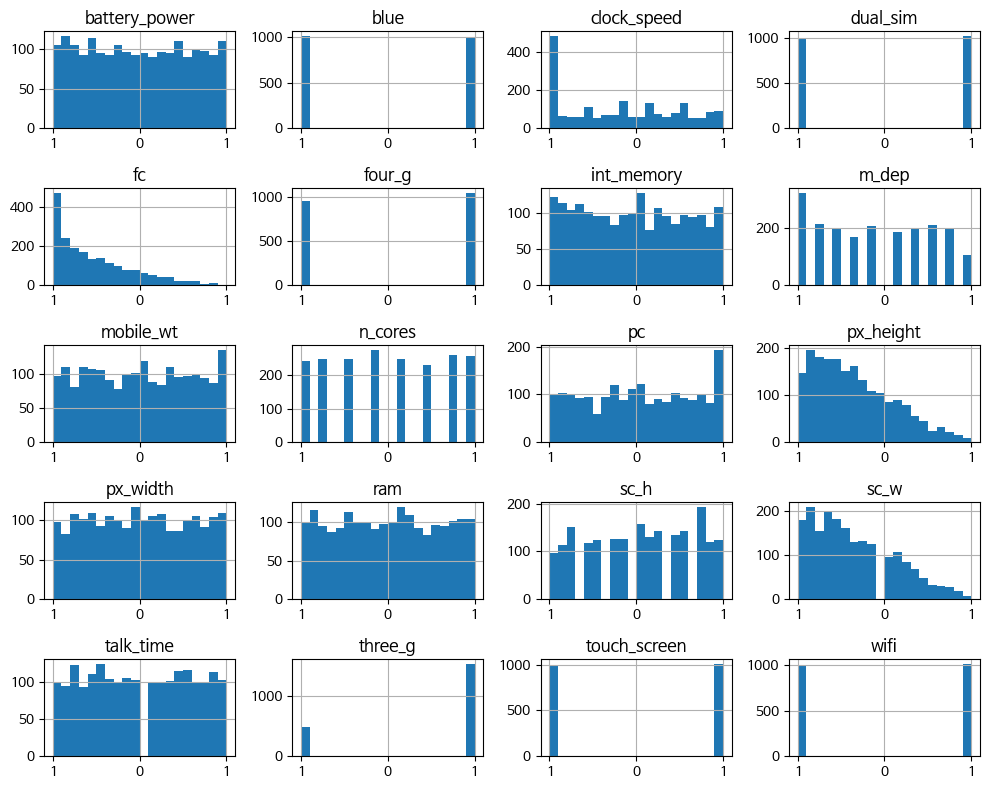

In [24]:
import matplotlib.pyplot as plt

# 데이터 프레임의 각 열에 대한 히스토그램 그리기
normalized_x.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.savefig('data_distribution.png')
plt.show()

In [25]:
def min_max_normalization(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column

min_max_normalize_x = x.apply(min_max_normalization)
min_max_normalize_x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


In [26]:
min_max_normalize_x.to_pickle('min_max_normalize_x.pkl')